In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

source1 = '../data/Gait_Data___Arm_swing.csv'
source2 = '../data/Consensus_Committee_Analytic_Datasets_28OCT21.xlsx'


# import data for a first visualisation
data = pd.read_csv(source1)
data.head()

# df_first = merge of all csv sheets from Analytic Datasets
file = source2

df1 = pd.read_excel(file,'PD')
df2 = pd.read_excel(file, 'HC')
df3 = pd.read_excel(file, 'Prodromal')
df4 = pd.read_excel(file, 'SWEDD')

df = pd.concat([df1, df2, df3, df4])

df_first = df.sort_values(['PATNO'])
df_first = df_first.set_index('PATNO')

#df_arm file analyzed
file_arm = source1
df_arm = pd.read_csv(file_arm)

# Get the PATNO of the unknown cohort
df_na_arm = df_arm.loc[df_arm['COHORT'].isna(),['PATNO']]
# Get their cohort
df_complete = df_first.loc[df_na_arm['PATNO'],['Cohort']].replace(['Prodromal',"Parkinson's Disease"],[1,3])
#Replace Nan in df_arm['COHORT']
df_arm.loc[df_arm.COHORT.isnull(), 'COHORT'] = list(df_complete['Cohort'])

df_arm.head(50)

FileNotFoundError: [Errno 2] No such file or directory: '../data/Gait_Data___Arm_swing.csv'

In [3]:
# 1ère méthode pour combler Nan avec KNN

from sklearn.impute import KNNImputer 

imputer = KNNImputer(n_neighbors=3)
df_arm_full = imputer.fit_transform(df_arm.iloc[:,4:])
df_arm_full = pd.DataFrame(df_arm_full, columns=df_arm.iloc[:,4:].columns)
df_arm_full.head(40)

,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,R_JERK_U,L_JERK_U,ASA_U,ASYM_IND_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,1.445,42.787289,31.405978,2.783204,2.597315,0.369588,0.001618,0.002542,9.754631,15.460948,...,0.554688,1.625000,0.612586,1.421568,10.390625,12.291016,0.546875,1.523438,0.565465,1.056312
1,1.211,41.744432,42.194299,2.286481,2.235276,0.019062,0.002209,0.003016,0.612344,0.961927,...,0.507812,1.312500,0.605626,1.284985,9.437500,11.674805,0.523438,1.441406,0.744995,1.209420
2,1.131,30.357805,42.788477,5.422287,5.012269,0.289054,0.002742,0.008316,10.824114,17.230208,...,0.593750,2.152344,0.741461,0.993754,13.781250,16.245117,0.554688,2.363281,0.713150,1.002639
3,1.395,47.294965,34.610918,7.725009,7.838284,0.375873,0.003395,0.005928,9.854201,15.628248,...,0.632812,1.804688,0.575304,1.137755,8.820312,8.132812,0.593750,1.500000,0.548270,3.290938
4,0.982,51.516231,30.989870,7.412588,4.762775,0.672047,0.049690,0.059845,15.409553,24.756537,...,0.632812,1.710938,0.509044,1.909214,8.609375,7.441406,0.640625,1.449219,0.667530,1.035053
5,1.563,61.052068,51.465144,18.543469,11.587096,0.207511,0.004151,0.006683,5.367299,8.527529,...,0.585938,1.296875,0.615345,1.256410,9.398438,10.333984,0.578125,1.128906,0.639181,1.080505
6,1.143,38.314673,33.248165,7.560887,8.128498,0.168624,0.081082,0.104493,4.843285,7.631833,...,0.625000,1.437500,0.381887,0.737591,7.562500,6.070312,0.609375,1.269531,0.491730,0.733162
7,1.042,22.526788,43.909882,8.733026,6.224986,0.479479,0.007078,0.007961,19.653523,32.064875,...,0.625000,2.820312,0.411788,1.137831,13.687500,12.632812,0.609375,2.761719,0.656651,1.349639
8,1.500,51.613331,37.382977,2.566866,3.752649,0.383879,0.030677,0.030634,10.120941,16.041298,...,0.625000,2.507812,0.503161,0.854427,9.640625,7.667969,0.656250,2.210938,0.762715,1.158379
9,0.964,15.610665,36.560067,4.258304,3.149224,0.569155,0.005900,0.004559,24.238172,40.296854,...,0.617188,2.472656,0.527426,2.056776,11.101562,8.835938,0.585938,2.457031,0.484080,1.557265


## <p style='font-size:30px;text-align:center;color:Cyan'>XGBoost<p>
<center><img src="images/xgboost.jpg"></center>

---

TODO : 
    
0. faire random forest avec pipeline standardscaler
1. faire grille et evaluation des meilleurs hyperparamètres
2. voir si avec imputation KNN ou sans mieux ?
3. Bons hyperparamètres par defaut pour odele de base??

#### <p style='font-size:20px;text-align:center;color:DarkBlue'>Recherche des meilleurs Hyperparamètres<p>
<center><img src='images/xgboost_par.jpg'></center>

---
#### Première approche avec initialisation basique qui sert de référence

---

In [23]:
import xgboost as xgb
from sklearn import metrics
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(df_arm_full, df_arm['COHORT'], test_size=0.2)
xgbc = xgb.XGBClassifier()
pipeline = Pipeline([('scaler', StandardScaler()), ('classifieur', xgbc)])
xgbc.fit(x_train, y_train)
print('Base Parameters utilisés :')
pprint(xgbc.get_params())

[23:23:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Base Parameters utilisés :
{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': True,
 'validate_parameters': 1,
 'verbosity': None}


/home/salembien/[/home/salembien/Bureau/anaconda3]/envs/IA/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Base XGBC :
Accuracy :  0.7435897435897436


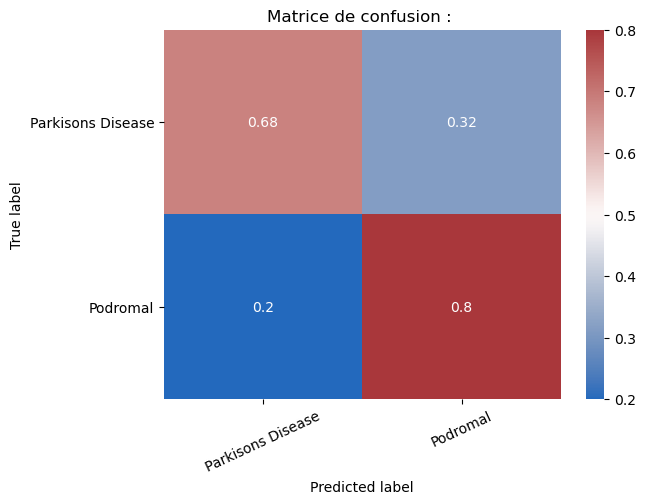

Rapport :
              precision    recall  f1-score   support

         1.0       0.76      0.68      0.72        19
         3.0       0.73      0.80      0.76        20

    accuracy                           0.74        39
   macro avg       0.75      0.74      0.74        39
weighted avg       0.75      0.74      0.74        39

[23:25:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/salembien/[/home/salembien/Bureau/anaconda3]/envs/IA/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:25:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:25:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:25:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:25:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [26]:
from sklearn import model_selection as ms
comp(xgbc, x_test, y_test, 'Base XGBC')
kf = ms.KFold(n_splits=5, shuffle=True)
kf_scores = ms.cross_val_score(xgbc, x_train, y_train, cv=kf)
print("K-fold Cross Validation vaut en moyenne: {:.2f}".format(kf_scores.mean()))

---
**Analyse plus fine des paramètres**

---

In [30]:
# 1er balayage sur large éventail de sets d'hyperparamètres avec RandomizedSearchCV

grille_xgb = { 
        'learning_rate': [0.05, 0.1, 0.3, 0.7],
        'n_estimators':[50, 200, 500, 1000],
        'max_depth': [i for i in range(3,20,2)],
        'lambda': [1],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.01, 0.1, 0.5, 1],
        'subsample': [0.1, 0.5, 1, 5],
        'colsample_bytree': [0.05, 0.1, 0.5, 1],
        'max_depth': [2, 5, 10, 20]}

# Choix aléatoire parmi 4*4*9*1*3*4*4*4*4=110592 combinaisons de paramètres possibles

In [32]:
# Random Search CV training

# 500 combinaisons et K = 5 folds
xgbc_random = RandomizedSearchCV(estimator = xgbc, param_distributions = grille_xgb, n_iter = 50, cv = 5, n_jobs = -1)
xgbc_random.fit(x_train, y_train)
xgbc_random.best_params_

KeyboardInterrupt: 

500 combinaisons et K=5folds:
{'subsample': 1,
 'n_estimators': 1000,
 'min_child_weight': 1,
 'max_depth': 2,
 'learning_rate': 0.7,
 'lambda': 1,
 'gamma': 1,
 'colsample_bytree': 0.1}

**Remarques:**
- *Analyse :*           
  Pour lr = 0.01 et max_depth=100 et num_iter=5000 classification moyenne avec accuracy moyenne de 58%  
  
- *Solutions :*  
  Changer la mesure sur laquelle nous effectuons une classification car 0.44 de corrélation,   
  c'était attendu que la classification ne soit pas bonne / se baser sur plus de mesures ?/ imputation des Nan nécessaire ?